#### 1. 라이브러리 및 경로 설정

In [1]:
# 필요한 패키지 import
import os 
import cv2 
import matplotlib.pyplot as plt 
import numpy as np 
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리
print("🌫🛸")

🌫🛸


In [2]:
# 작업 및 파일 위치 확인
import os
print(os.getcwd())
os.listdir('/home/jovyan/data')

/home/jovyan


['hero.png', 'image.png', 'king.png']

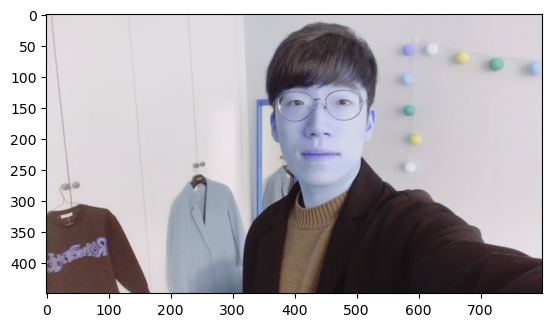

In [3]:
home_dir = os.getenv('HOME')
my_image_path = os.path.join(home_dir, 'data', 'image.png') 
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지 가져오기
img_show = img_bgr.copy()      # 출력용 이미지 카피
plt.imshow(img_bgr) 
plt.show() 

### 2. face detection

In [4]:
# detector를 선언
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 디텍터
print("🌫🛸")

🌫🛸


In [5]:
# bounding box 만들기
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("🌫🛸")

🌫🛸


rectangles[[(345, 98) (531, 284)]]


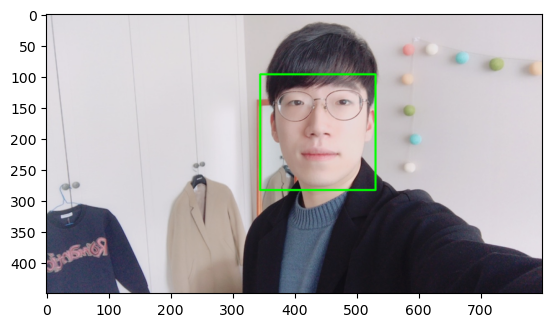

In [6]:
# 바운딩 박스 리스트 및 이미지 출력

print(dlib_rects)

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 3. face landmark

##### Object keypoint estimation 2가지 방식 중 top-down 방식 적용
- top-down : bounding box를 찾고 box 내부의 keypoint를 예측
- bottom-up : 이미지 전체의 keypoint를 먼저 찾고 point 관계를 이용해 군집화 해서 box 생성

In [7]:
# landmark 모델 불러오기
model_path = os.path.join(home_dir, 'work/camera_sticker/models/shape_predictor_68_face_landmarks.dat')
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [8]:
# landmark_predictor 는 RGB 이미지와 dlib.rectangle을 입력 받아 dlib.full_object_detection를 반환

list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고

68


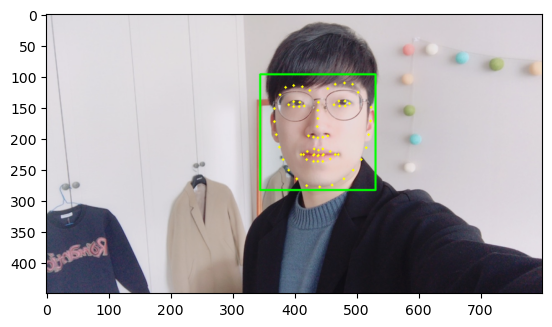

In [9]:
# 랜드마크를 이미지 출력

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

### 4. 왕관 Sticker 연습

In [11]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[30]) # 코
    x = landmark[30][0]  # 코 부위의 x값
    y = landmark[30][1] - dlib_rect.height()//2
    # 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 → (437, 182-(186+1//2))
    w = h = dlib_rect.width() 
    # 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(437, 182)
(x,y) : (437,89)
(w,h) : (187,187)


In [12]:
sticker_path = os.path.join(home_dir, 'data', 'king.png') 
img_sticker = cv2.imread(sticker_path) # cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) 
# 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) 

(187, 187, 3)


In [13]:
refined_x = x - w // 2 
# 437 - (187//2) = 437-93 = 344
refined_y = y - h 
# 89-187 = -98
# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표 조정.
# 이미지 시작점은 top-left 좌표이기 때문입니다.
# 즉, refined_x, refined_y값에서 왕관 이미지가 시작됨

print (f'(x,y) : ({refined_x},{refined_y})') # 음수 발생 : 이미지 범위를 벗어남
# 우리는 현재 이마 자리에 왕관을 두고 싶은건데, 이마위치 - 왕관 높이를 했더니 이미지의 범위를 초과하여 음수가 나오는 것
# opencv는 ndarray데이터를 사용하는데, ndarray는 음수인덱스에 접근 불가하므로 스티커 이미지를 잘라 줘야 한다.

(x,y) : (344,-98)


In [14]:
# 음수 조정
if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
# 왕관 이미지를 씌우기 위해 왕관 이미지가 시작할 y좌표 값 조정
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] 
    # refined_y가 -98이므로, img_sticker[98: , :]가 된다. (187, 187, 3)에서 (89, 187, 3)이 됨 (187개 중에서 98개가 잘려나감)
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (344,0)


In [15]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
print("슝~")

슝~


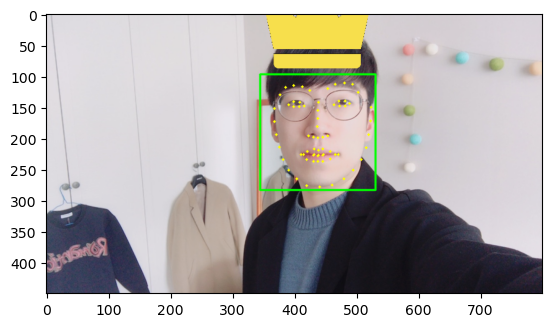

In [16]:
# 왕관 이미지를 적용한 이미지를 보여준다.
# 얼굴 영역(7-3)과 랜드마크(7-4)를 미리 적용해놓은 img_show에 왕관 이미지를 덧붙인 이미지가 나오게 된다.)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

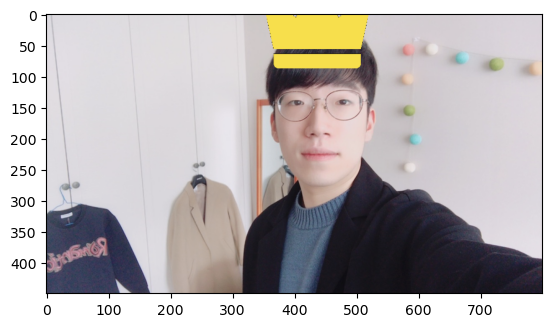

In [17]:
# 바운딩 박스 제거
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr은 7-2에서 rgb로만 적용해놓은 원본 이미지이다.
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 됨
plt.show()

### 5. 프로젝트 고양이 콧수염 붙이기 프로젝트

In [18]:
## 1) 콧수염 위치 기준점 잡기(코 아래 중심 + 폭/높이 결정)

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):

    # 입 좌/우 끝
    left_mouth  = landmark[48]   # (x, y)
    right_mouth = landmark[54]

    # 코 아래(콧구멍 아래쪽)
    nose_bottom = landmark[33]
    upper_lip   = landmark[51]

    # 콧수염 중심점(입 폭의 중앙)
    x = (left_mouth[0] + right_mouth[0]) // 2

    # y는 코 아래와 윗입술 사이 어딘가(조절 가능)
    y = (nose_bottom[1] + upper_lip[1]) // 2

    # 콧수염 크기: 입 폭을 기준으로 (약 1.2배 추천)
    w = int((right_mouth[0] - left_mouth[0]) * 1.2)

    # 높이는 폭에 비례 (콧수염 이미지에 따라 0.4~0.6 사이 조절)
    h = int(w * 0.5)

    print("whisker center:", (x, y), "size:", (w, h))


whisker center: (441, 210) size: (72, 36)


In [19]:
# =========================
# 2) 스티커 로드 + (흰배경이면) 알파 만들기
# =========================
sticker_path = os.path.join(home_dir, 'cat-whiskers.png')
img_sticker = cv2.imread(sticker_path, cv2.IMREAD_UNCHANGED)
if img_sticker is None:
    raise ValueError("스티커 이미지 로드 실패: sticker_path 확인")

if img_sticker.ndim == 2:
    img_sticker = cv2.cvtColor(img_sticker, cv2.COLOR_GRAY2BGRA)

# 알파가 없으면(3채널) 흰색을 투명으로 만들어 BGRA로 변환
if img_sticker.shape[2] == 3:
    mask_white = cv2.inRange(img_sticker, (240,240,240), (255,255,255))  # 필요하면 230으로
    alpha = cv2.bitwise_not(mask_white)
    img_sticker = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2BGRA)
    img_sticker[:, :, 3] = alpha

In [20]:
# =========================
# 3) 크기 조절 (SCALE 적용!)
# =========================
SCALE = 3.0  # ⭐ 1.2, 1.5, 2.0 처럼 조절

w2 = max(1, int(w * SCALE))
h2 = max(1, int(h * SCALE))

bgr = img_sticker[:, :, :3]
a   = img_sticker[:, :, 3]

bgr = cv2.resize(bgr, (w2, h2), interpolation=cv2.INTER_LINEAR)
a   = cv2.resize(a,   (w2, h2), interpolation=cv2.INTER_NEAREST)

img_sticker = cv2.cvtColor(bgr, cv2.COLOR_BGR2BGRA)
img_sticker[:, :, 3] = a

print("scaled sticker:", img_sticker.shape)

scaled sticker: (108, 216, 4)


In [21]:
# =========================
# 4) 좌표 (center -> top-left)  ★ w2,h2 기준!
# =========================
refined_x = x - w2 // 2
refined_y = y - h2 // 2

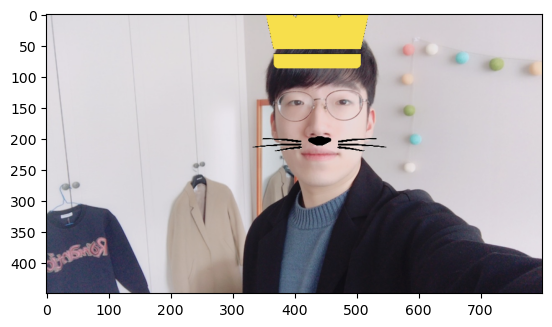

In [22]:
# =========================
# 5) 이미지 밖 처리 + 알파 합성
# =========================
img_result = img_bgr.copy()
H, W = img_result.shape[:2]

x1, y1 = refined_x, refined_y
x2, y2 = refined_x + w2, refined_y + h2

# 스티커에서 자를 부분
sx1 = max(0, -x1)
sy1 = max(0, -y1)
sx2 = w2 - max(0, x2 - W)
sy2 = h2 - max(0, y2 - H)

# 원본에서 붙일 부분
x1 = max(0, x1); y1 = max(0, y1)
x2 = min(W, x2); y2 = min(H, y2)

if x1 >= x2 or y1 >= y2:
    print("스티커가 화면 밖이라 합성 스킵")
else:
    sticker_crop = img_sticker[sy1:sy2, sx1:sx2]
    roi = img_result[y1:y2, x1:x2]

    sticker_bgr = sticker_crop[:, :, :3]
    alpha = (sticker_crop[:, :, 3] / 255.0)[:, :, None]

    img_result[y1:y2, x1:x2] = (alpha * sticker_bgr + (1 - alpha) * roi).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB))
plt.show()